In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import hamming_loss
import matplotlib
from sklearn.preprocessing import StandardScaler

In [3]:
movies_df = pd.read_csv('data/movies_df.csv')

In [4]:
movies_df.head(2)

,title,synopsis,Adventure,Action,Romance,Thriller,Drama,Horror,Science Fiction,Comedy
0,Expend4bles,Armed with every weapon they can get their han...,1,1,0,1,0,0,0,0
1,Mission: Impossible - Dead Reckoning Part One,Ethan Hunt and his IMF team embark on their mo...,0,1,0,1,0,0,0,0


In [5]:
movies_df['length_syn'] = movies_df['synopsis'].str.len()

In [6]:
movies_df.head(2)

,title,synopsis,Adventure,Action,Romance,Thriller,Drama,Horror,Science Fiction,Comedy,length_syn
0,Expend4bles,Armed with every weapon they can get their han...,1,1,0,1,0,0,0,0,304
1,Mission: Impossible - Dead Reckoning Part One,Ethan Hunt and his IMF team embark on their mo...,0,1,0,1,0,0,0,0,483


<Axes: >

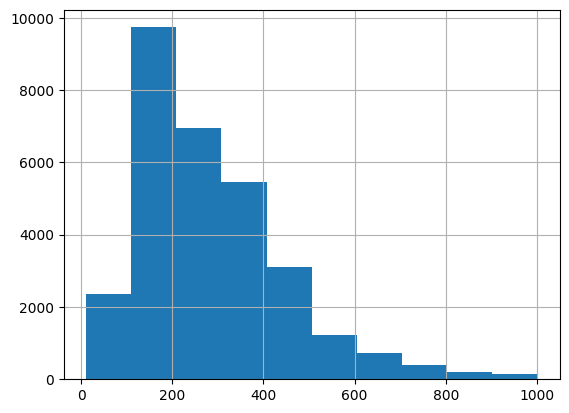

In [7]:
movies_df.length_syn.hist()

In [8]:
def genres_to_list(row):
    genres = [col for col in movies_df.columns if col not in ['title', 'synopsis'] and row[col] == 1]
    return genres

# Apply the function to each row
movies_df['labels'] = movies_df.apply(genres_to_list, axis=1)

In [9]:
movies_df['string_labels'] = movies_df['labels'].astype(str)

In [10]:
vect= TfidfVectorizer()

In [11]:
dtm = vect.fit_transform(movies_df['synopsis'])

In [12]:
feature_names = vect.get_feature_names_out()

# Print out the feature names
print(feature_names)

['00' '000' '000th' ... '害統領バッチード' '青木' 'ﬁnd']


In [13]:
movies_df['labels'].head(2)

0    [Adventure, Action, Thriller]
1               [Action, Thriller]
Name: labels, dtype: object

In [14]:
movies_df.head(2)

,title,synopsis,Adventure,Action,Romance,Thriller,Drama,Horror,Science Fiction,Comedy,length_syn,labels,string_labels
0,Expend4bles,Armed with every weapon they can get their han...,1,1,0,1,0,0,0,0,304,"[Adventure, Action, Thriller]","['Adventure', 'Action', 'Thriller']"
1,Mission: Impossible - Dead Reckoning Part One,Ethan Hunt and his IMF team embark on their mo...,0,1,0,1,0,0,0,0,483,"[Action, Thriller]","['Action', 'Thriller']"


In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(movies_df['synopsis'], movies_df['labels'], test_size=0.2, random_state=42)

In [16]:
# Convert labels using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)

In [17]:
# Text vectorization
vectorizer = TfidfVectorizer(max_features=15000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [18]:
# Build the model
lr = LogisticRegression(solver='lbfgs',max_iter=500)
clf = OneVsRestClassifier(lr)

# Train the model
clf.fit(X_train_tfidf, y_train)



OneVsRestClassifier(estimator=LogisticRegression(max_iter=500))

In [19]:
# Predict on test data
y_pred = clf.predict(X_test_tfidf)

In [20]:
# Evaluate the model
loss = hamming_loss(y_test, y_pred)
print(f"Hamming Loss: {loss}")

Hamming Loss: 0.17931915595120343


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [22]:
print(f'Precision score: {precision_score(y_test, y_pred, average="weighted"):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred, average="weighted"):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred, average="weighted"):.2f}')

Precision score: 0.75
Recall score:    0.43
F1 score:        0.54


In [23]:
# Here's the list of new synopses
new_synopses = [
    "John and Mary move into a new house in Mary's old family house. They don't know the horror hiding behind the door..",
    "Paris is the background to the encounter between Luca and Rossana, both recently divorced.",
    "Mordrion is a planet in galaxy 43o, an alien invasion is the occasion to fight for freedom"
]

# Step 1: Vectorize the new synopses
new_synopses_vectorized = vectorizer.transform(new_synopses)

# Step 2: Predict the classes for all synopses
predicted_classes = clf.predict(new_synopses_vectorized)

# Step 3: Invert the predictions back to the original labels
predicted_labels = mlb.inverse_transform(predicted_classes)

# Iterate over the predicted labels and print the result for each synopsis
for i, labels in enumerate(predicted_labels):
    print(f"Synopsis {i+1} Predicted Genres: {', '.join(labels)}")


Synopsis 1 Predicted Genres: Horror
Synopsis 2 Predicted Genres: Comedy, Drama
Synopsis 3 Predicted Genres: Action, Science Fiction
